# ENVIRONMENT CREATED

### Introduction to MDP
Markovian processes are stochastic processes that model situations in which the transition between states is probabilistic and is characterized by the fact that the probability of passing into a subsequent state depends exclusively on the current state.

In an MDP problem the agent knows which state it is in, so to find the optimal policy π (s), the agent refers directly to its real state s. The agent just executes the recommended policy for the current state.

## CASE STUDY

The environment is made up of a 4x3 grid where an agent moves inside. Starting from the initial state, the agent must choose an action in each time step; the iteration with the environment ends when the agent reaches one of the two objective states, marked +1 and -1. In each position the possible actions are Left, Up, Right, Down.

The model adopted is of the stochastic type so we have a certain probability, 0.8, that the chosen action has the desired effect and a probability of 0.1 that the agent moves in another cell with respect to the desired direction.

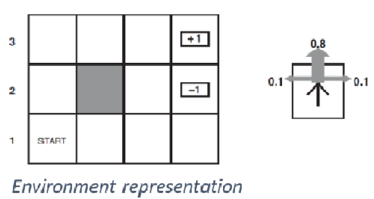

In [1]:
import mdptoolbox
import numpy as np
import scipy.spatial
import matplotlib
import matplotlib.pyplot as plt
import pandas
from pandas import *

The transitions model P (s ’| s, a) is composed of the probabilities of all the outcomes of the actions for each individual state.

The probability that the chosen action has an effect is defined in each cell; the departure state is defined on the rows and the agent's arrival states on the columns after applying the action. There are four matrices defined for the four actions that can be applied and which will then form the P matrix of transactions.

In [2]:
P_left=np.array([
    [0.8, 0.1, 0, 0, 0.1, 0, 0, 0, 0, 0, 0],
    [0.8, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.8, 0, 0.1, 0, 0.1, 0, 0, 0, 0, 0],
    [0, 0, 0.8, 0.1, 0, 0, 0.1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.9, 0, 0, 0.1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.8, 0.1, 0, 0, 0.1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.9, 0.1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.8, 0.1, 0.1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.1, 0.1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

P_up=np.array([
    [0.1, 0.1, 0, 0, 0.8, 0, 0, 0, 0, 0, 0],
    [0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.1, 0, 0.1, 0, 0.8, 0, 0, 0, 0, 0],
    [0, 0, 0.1, 0.1, 0, 0, 0.8, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.2, 0, 0, 0.8, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.1, 0.1, 0, 0, 0.8, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.9, 0.1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.1, 0.8, 0.1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.8, 0.1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

P_right=np.array([
    [0.1, 0.8, 0, 0, 0.1, 0, 0, 0, 0, 0, 0],
    [0.1, 0.1, 0.8, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.1, 0, 0.8, 0, 0.1, 0, 0, 0, 0, 0],
    [0, 0, 0.1, 0.8, 0, 0, 0.1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.9, 0, 0, 0.1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.1, 0.8, 0, 0, 0.1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.2, 0.8, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.8, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.8],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

P_down=np.array([
    [0.9, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.1, 0.9, 0, 0, 0, 0, 0, 0, 0],
    [0.8, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.8, 0, 0, 0.1, 0.1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.8, 0, 0, 0.1, 0.1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.1, 0.8, 0.1, 0],
    [0, 0, 0, 0, 0, 0.8, 0, 0, 0.1, 0, 0.1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

P=np.array([P_left, P_up, P_right, P_down])

In this example, a reward of -0.04 has been defined for all states excluding terminal states which, as we know, have a reward of +/- 1.

In [3]:
R=np.array([[-0.04, -0.04, -0.04, -0.04],
            [-0.04, -0.04, -0.04, -0.04],
            [-0.04, -0.04, -0.04, -0.04],
            [-0.04, -0.04, -0.04, -0.04],
            [-0.04, -0.04, -0.04, -0.04],
            [-0.04, -0.04, -0.04, -0.04],
            [-1, -1, -1, -1],
            [-0.04, -0.04, -0.04, -0.04],
            [-0.04, -0.04, -0.04, -0.04],
            [-0.04, -0.04, -0.04, -0.04],
            [+1, +1, +1, +1]])

Initialization discount value

In [4]:
discount=0.8

Support function to print 4x3 grid with optimal action for each state 

In [5]:
def print_matrix(policy):
    
    policy = list(policy)
    policy1 = list(policy[:5])
    policy1.append(None)
    policy1 = policy1 + policy[5:]

    policy2 = []
    policy2 = list(policy2)

    policy_1 = list(policy1[8:12])
    policy_2 = list(policy1[4:8])
    policy_3 = list(policy1[0:4])
    policy2 = policy_1 + policy_2 + policy_3

    policy3 = []
    for i in range(len(policy2)):
        if(policy2[i] == 0):
            policy3.append('  ←   ')
        elif(policy2[i] == 1):
            policy3.append('  ↑   ')
        elif(policy2[i] == 2):
            policy3.append('  →   ')
        elif(policy2[i] == 3):
            policy3.append('  ↓   ')
        else:
            policy3.append(' None ')
    print("--------------------------")
    for i in range(0, 12, 4):
        print("|".join(policy3[i:i+4]), sep="|")
        print("--------------------------")

## VALUE ITERATION

It calculates the utility of all states and uses it to choose the optimal action in each state. The utility of one state is the immediate reward for the state plus the expected utility of the next state.

In the Value Iteration algorithm the main idea is to iterate to find an optimal action that maximizes the expected utility. Then using the optimal utility we calculate the optimal policy.

It iterates until equilibrium is reached (less than an ε)


-----
Function **VALUE-ITERATION(mdp, ε)** returns a utility function

Inputs:
- mdp, an MDP with states S
- actions A(s)
- transition model P(s′ | s, a)
- rewards R(s)
- discount γ
- ε the maximum error allowed in the utility of any state

Local variables:
- U, U′, vectors of utilities for states in S, initially zero
- δ, the maximum change in the utility of any state in an iteration
```
repeat
    U ← U′; δ ← 0
    for each state s in S do
        U′[s] ← R(s) + γ max a ∈ A(s) Σ P(s′ | s, a) U[s′]
        if | U′[s] − U[s] | > δ then δ ← | U′[s] − U[s] |
until δ < ε(1 − γ)/γ
return U
```

In [6]:
vi = mdptoolbox.mdp.ValueIteration(P, R, discount)
vi.run()

In [7]:
print("Number of iterations:", vi.iter)

print('Value function: ', np.round(vi.V, 2))
mean=np.mean(vi.V)
print("Expected return:", np.round(mean, 2))

print("Policy:", vi.policy)
print_matrix(vi.policy)

Number of iterations: 30
Value function:  [ 1.06  1.03  1.4   0.5   1.47  2.07 -4.99  1.99  2.68  3.66  4.99]
Expected return: 1.44
Policy: (1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0)
--------------------------
  →   |  →   |  →   |  ←   
--------------------------
  ↑   | None |  ↑   |  ←   
--------------------------
  ↑   |  →   |  ↑   |  ←   
--------------------------


## POLICY ITERATION

Calculate the value of a policy and try to "improve" it.

Policy iteration performs two steps for each iteration of the main outer loop:
1. Policy evaluation: given a policy πi, Ui = Uπi is calculated, the usefulness of each state if πi were to be performed
2. Policy improvement: a new policy πi + 1 is calculated, choosing the next states based on Ui

The algorithm ends when iteration i does not change the policy

---
Function **POLICY-ITERATION(mdp)** returns a policy

Inputs:
- mdp, an MDP with states S
- actions A(s)
- transition model P(s′ | s, a)

Local variables:
- U, a vector of utilities for states in S, initially zero
- π, a policy vector indexed by state, initially random

```
repeat
    U ← POLICY-EVALUATION(π, U, mdp)
    unchanged? ← true
    for each state s in S do
        if maxa ∈ A(s) Σs′ P(s′ | s, a) U[s′] > Σs′ P(s′ | s, π[s]) U[s′] then do
        π[s] ← argmaxa ∈ A(s) Σs′ P(s′ | s, a) U[s′]
        unchanged? ← false
until unchanged?
return π
```

<br></br>
Function **POLICY-EVALUATION (π, U, mdp)** returns a utility function

Inputs:
- mdp, an MDP with states S,
- π the policy to be evaluated,
- U a vector of utilities for states  

Local variables:
- δ, θ small threshold

```
repeat
    δ ← 0
    for each state s in S do
        u ← U(s)
        U(S) ← Σs′ P(s′ | s, π[s]) [R(s’) + γ U(s’)]
        δ ← max (δ, |u – U(s)| )
until  δ < θ
return U
```

In [8]:
pi=mdptoolbox.mdp.PolicyIteration(P, R, discount)
pi.run()

In [9]:
print("Number of iterations:", pi.iter,)

print('Value function: ', np.round(pi.V, 2))
mean=np.mean(pi.V)
print("Expected return:", np.round(mean, 2))

print("Policy:", pi.policy)
print_matrix(pi.policy)

Number of iterations: 4
Value function:  [ 1.07  1.03  1.41  0.5   1.47  2.07 -5.    2.    2.68  3.67  5.  ]
Expected return: 1.45
Policy: (1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0)
--------------------------
  →   |  →   |  →   |  ←   
--------------------------
  ↑   | None |  ↑   |  ←   
--------------------------
  ↑   |  →   |  ↑   |  ←   
--------------------------


## Q-LEARNING

When the q-learning algorithm is run, a q table or matrix is ​​created that follows the form of [state, action] and is initialized to zero. The values ​​are updated and stored after each action. Table q becomes a reference table for the agent to select the best action based on the q value.

The agent can perform two actions: exploit or explore. The first is to use table q as a reference and view all possible actions for a given state. The agent then selects the stock based on the maximum value of those shares. This is known as exploitation as we use the information available to us to make a decision.

The second way to act is to act randomly, instead of selecting actions based on the maximum future reward we select an action at random. Acting haphazardly is important because it allows the agent to explore and discover new states that might not otherwise be selected during the exploitation process.

---
Function **Q-LEARNING-AGENT(percept)** returns an action

Inputs:
- percept, a percept indicating the current state s′ and reward signal r′

Persistent:
- Q, a table of action values indexed by state and action, initially zero
- Nsa, a table of frequencies for state–action pairs, initially zero
- s, a, r, the previous state, action, and reward, initially null

```
if TERMINAL?(s) then Q[s,None]←r′
if s is not null then
    increment Nsa [s, a]
    Q[s, a] ← Q[s, a] + α(Nsa [s, a])(r + γ maxa′ Q[s′, a′] − Q[s, a])
s, a, r ← s′ , argmaxa′ f(Q[s′, a′], Nsa [s′, a′]), r′
return a
```

In this first case we analyze the q-learning algorithm applied with the minimum number of possible iterations, which is 10000. Then we apply the algorithm again to different values ​​of number of iterations

In [10]:
ql=mdptoolbox.mdp.QLearning(P, R, discount)
ql.run()

In [11]:
print("Value function:", np.round(ql.V, 2))
mean=np.mean(ql.V)
print("Expected return:", np.round(mean, 2))

print("Q-matrix:", np.round(ql.Q,2))

print("Policy:", ql.policy)
print_matrix(ql.policy)

Value function: [-0.02 -0.01  0.02 -0.02 -0.02  0.33 -4.52  0.05  0.56  2.56  5.  ]
Expected return: 0.36
Q-matrix: [[-0.02 -0.02 -0.02 -0.02]
 [-0.01 -0.01 -0.01 -0.01]
 [-0.01  0.02 -0.01 -0.01]
 [-0.05 -0.07 -0.09 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [ 0.    0.33 -0.24 -0.  ]
 [-4.52 -4.52 -4.52 -4.52]
 [-0.01 -0.01  0.05 -0.01]
 [-0.01 -0.01  0.56  0.  ]
 [ 0.07  0.03  2.56 -0.  ]
 [ 4.95  5.    4.97  4.96]]
Policy: (0, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1)
--------------------------
  →   |  →   |  →   |  ↑   
--------------------------
  ↑   | None |  ↑   |  ↑   
--------------------------
  ←   |  ↑   |  ↑   |  ↓   
--------------------------


#### Q-learning with 10000, 100000, 1000000 iterations

In [12]:
print('Number of iterations: 10000')
ql1=mdptoolbox.mdp.QLearning(P, R, discount, 10000)
ql1.run()
print("Value function:", np.round(ql1.V, 2))
mean=np.mean(ql1.V)
print("Expected return:", np.round(mean, 2))

dist_ql1=scipy.spatial.distance.euclidean(pi.V, ql1.V)
print("Euclidean distance: ", round(dist_ql1, 2))


print('\nNumber of iterations: 100000')
ql2=mdptoolbox.mdp.QLearning(P, R, discount, 100000)
ql2.run()
print("Value function:", np.round(ql2.V, 2))
mean=np.mean(ql2.V)
print("Expected return:", np.round(mean, 2))

dist_ql2=scipy.spatial.distance.euclidean(pi.V, ql2.V)
print("Euclidean distance: ", round(dist_ql2, 2))


print('\nNumber of iterations: 1000000')
ql3=mdptoolbox.mdp.QLearning(P, R, discount, 1000000)
ql3.run()
print("Value function:", np.round(ql3.V, 2))
mean=np.mean(ql3.V)
print("Expected return:", np.round(mean, 2))

dist_ql3=scipy.spatial.distance.euclidean(pi.V, ql3.V)
print("Euclidean distance: ", round(dist_ql3, 2))

Number of iterations: 10000
Value function: [-0.02 -0.02 -0.02 -0.08 -0.02  0.21 -4.81  0.03  0.53  2.38  5.  ]
Expected return: 0.29
Euclidean distance:  4.53

Number of iterations: 100000
Value function: [-0.01  0.14  0.71 -0.03  0.1   1.73 -4.99  0.81  2.06  3.58  5.  ]
Expected return: 0.83
Euclidean distance:  2.55

Number of iterations: 1000000
Value function: [ 0.53  0.66  1.29  0.19  1.3   2.02 -5.    1.97  2.69  3.68  5.  ]
Expected return: 1.3
Euclidean distance:  0.76


In the code section above we have calculated the Euclidean distance between the values of the value function obtained with Policy Iteration and the values of the value function obtained with Q-learning algorithm  and as it shows the graph below, this value decreases with increasing number of iterations

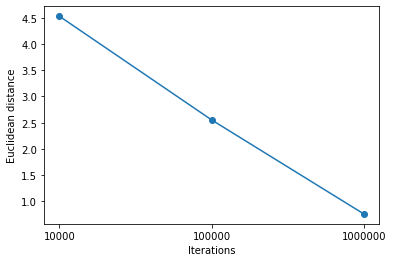

In [13]:
plt.xlabel('Iterations')
plt.ylabel('Euclidean distance')
x=['10000', '100000', '1000000']
y=[dist_ql1, dist_ql2, dist_ql3]
plt.plot(x, y, marker='o')
plt.show()

#### _References:_
_Artificial Intelligent: a modern approach (third edition) - S. Russel, P. Norvig_ <br/>
_Markov Decision Process (MDP) Toolbox
https://pymdptoolbox.readthedocs.io/en/latest/api/mdptoolbox.html_